============== 1/16 ==============
epoch:0 | 0.094 - 0.097


../common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.114
epoch:2 | 0.097 - 0.136
epoch:3 | 0.097 - 0.159
epoch:4 | 0.097 - 0.185
epoch:5 | 0.097 - 0.213
epoch:6 | 0.097 - 0.228
epoch:7 | 0.097 - 0.252
epoch:8 | 0.097 - 0.273
epoch:9 | 0.097 - 0.297
epoch:10 | 0.097 - 0.314
epoch:11 | 0.097 - 0.328
epoch:12 | 0.097 - 0.333
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.356
epoch:15 | 0.097 - 0.377
epoch:16 | 0.097 - 0.392
epoch:17 | 0.097 - 0.401
epoch:18 | 0.097 - 0.417
epoch:19 | 0.097 - 0.417
============== 2/16 ==============
epoch:0 | 0.116 - 0.133


/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


epoch:1 | 0.1 - 0.133
epoch:2 | 0.1 - 0.138
epoch:3 | 0.099 - 0.167
epoch:4 | 0.099 - 0.191
epoch:5 | 0.1 - 0.214
epoch:6 | 0.1 - 0.236
epoch:7 | 0.116 - 0.258
epoch:8 | 0.116 - 0.282
epoch:9 | 0.116 - 0.319
epoch:10 | 0.116 - 0.343
epoch:11 | 0.116 - 0.37
epoch:12 | 0.116 - 0.387
epoch:13 | 0.116 - 0.417
epoch:14 | 0.116 - 0.446
epoch:15 | 0.117 - 0.461
epoch:16 | 0.116 - 0.474
epoch:17 | 0.117 - 0.499
epoch:18 | 0.117 - 0.515
epoch:19 | 0.117 - 0.528
============== 3/16 ==============
epoch:0 | 0.143 - 0.063
epoch:1 | 0.316 - 0.083
epoch:2 | 0.446 - 0.116
epoch:3 | 0.552 - 0.167
epoch:4 | 0.593 - 0.214
epoch:5 | 0.664 - 0.252
epoch:6 | 0.719 - 0.293
epoch:7 | 0.754 - 0.331
epoch:8 | 0.811 - 0.358
epoch:9 | 0.839 - 0.396
epoch:10 | 0.867 - 0.427
epoch:11 | 0.894 - 0.463
epoch:12 | 0.896 - 0.49
epoch:13 | 0.924 - 0.515
epoch:14 | 0.938 - 0.524
epoch:15 | 0.94 - 0.556
epoch:16 | 0.959 - 0.573
epoch:17 | 0.968 - 0.595
epoch:18 | 0.973 - 0.605
epoch:19 | 0.973 - 0.63
============== 4/16 =

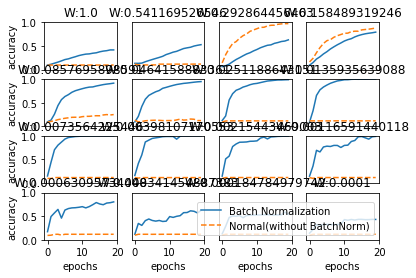

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

===========iteration:0===========
SGD:2.35096609732
AdaGrad:1.97357377056
Momentum:2.38791560456
Adam:2.17291047118
===========iteration:100===========
SGD:1.32520166601
AdaGrad:0.140884898779
Momentum:0.436237343063
Adam:0.325012824533
===========iteration:200===========
SGD:0.72110208132
AdaGrad:0.0702047235509
Momentum:0.271684706053
Adam:0.177959071902
===========iteration:300===========
SGD:0.533026085028
AdaGrad:0.132395665886
Momentum:0.254706963376
Adam:0.217125612294
===========iteration:400===========
SGD:0.400633221931
AdaGrad:0.0308370506279
Momentum:0.130519021088
Adam:0.0814169974124
===========iteration:500===========
SGD:0.335485010975
AdaGrad:0.0355699012671
Momentum:0.109942847969
Adam:0.046450803407
===========iteration:600===========
SGD:0.439452693761
AdaGrad:0.105901198476
Momentum:0.22461899894
Adam:0.188433403396
===========iteration:700===========
SGD:0.270332661147
AdaGrad:0.0682109572613
Momentum:0.10614625223
Adam:0.102304976288
===========iteration:800=====

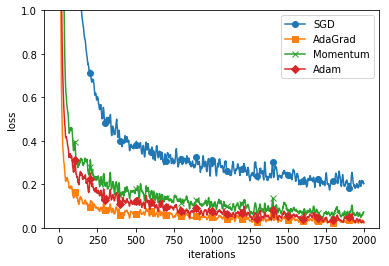

In [13]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


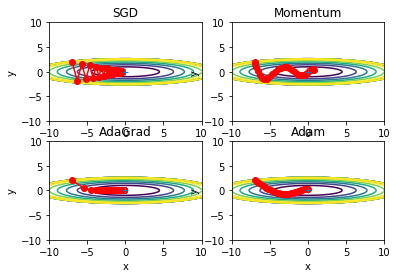

In [14]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

epoch:0, train acc:0.126666666667, test acc:0.1133
epoch:1, train acc:0.143333333333, test acc:0.1128
epoch:2, train acc:0.153333333333, test acc:0.1189
epoch:3, train acc:0.173333333333, test acc:0.1248
epoch:4, train acc:0.18, test acc:0.1272
epoch:5, train acc:0.196666666667, test acc:0.1352
epoch:6, train acc:0.22, test acc:0.1449
epoch:7, train acc:0.24, test acc:0.155
epoch:8, train acc:0.25, test acc:0.1673
epoch:9, train acc:0.27, test acc:0.176
epoch:10, train acc:0.29, test acc:0.1916
epoch:11, train acc:0.313333333333, test acc:0.2083
epoch:12, train acc:0.336666666667, test acc:0.2322
epoch:13, train acc:0.353333333333, test acc:0.2433
epoch:14, train acc:0.38, test acc:0.2569
epoch:15, train acc:0.41, test acc:0.2791
epoch:16, train acc:0.396666666667, test acc:0.2942
epoch:17, train acc:0.403333333333, test acc:0.3098
epoch:18, train acc:0.423333333333, test acc:0.322
epoch:19, train acc:0.426666666667, test acc:0.3316
epoch:20, train acc:0.43, test acc:0.3391
epoch:21, t

epoch:170, train acc:0.896666666667, test acc:0.7184
epoch:171, train acc:0.9, test acc:0.7159
epoch:172, train acc:0.9, test acc:0.7134
epoch:173, train acc:0.893333333333, test acc:0.7175
epoch:174, train acc:0.89, test acc:0.7175
epoch:175, train acc:0.896666666667, test acc:0.7131
epoch:176, train acc:0.886666666667, test acc:0.7159
epoch:177, train acc:0.893333333333, test acc:0.7087
epoch:178, train acc:0.903333333333, test acc:0.7177
epoch:179, train acc:0.886666666667, test acc:0.7171
epoch:180, train acc:0.89, test acc:0.7161
epoch:181, train acc:0.896666666667, test acc:0.7144
epoch:182, train acc:0.89, test acc:0.712
epoch:183, train acc:0.893333333333, test acc:0.7123
epoch:184, train acc:0.893333333333, test acc:0.7197
epoch:185, train acc:0.896666666667, test acc:0.7194
epoch:186, train acc:0.893333333333, test acc:0.7212
epoch:187, train acc:0.9, test acc:0.7126
epoch:188, train acc:0.896666666667, test acc:0.7104
epoch:189, train acc:0.89, test acc:0.7053
epoch:190, tra

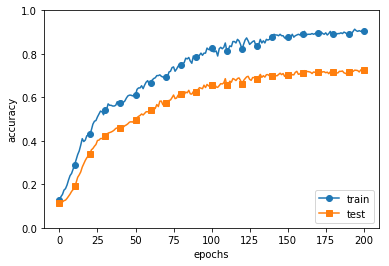

In [15]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.26107147274
=== epoch:1, train acc:0.133333333333, test acc:0.0965 ===
train loss:2.29447074009
train loss:2.2846995002
train loss:2.28759282414
=== epoch:2, train acc:0.13, test acc:0.0952 ===
train loss:2.3055769469
train loss:2.2801141679
train loss:2.28345161663
=== epoch:3, train acc:0.133333333333, test acc:0.0952 ===
train loss:2.3013420069
train loss:2.29185089308
train loss:2.2961968429
=== epoch:4, train acc:0.133333333333, test acc:0.0962 ===
train loss:2.28993465765
train loss:2.28398573243
train loss:2.27516918073
=== epoch:5, train acc:0.133333333333, test acc:0.0968 ===
train loss:2.30114439472
train loss:2.28576076758
train loss:2.29688226909
=== epoch:6, train acc:0.14, test acc:0.0976 ===
train loss:2.27455357976
train loss:2.31376038374
train loss:2.28933187284
=== epoch:7, train acc:0.14, test acc:0.0971 ===
train loss:2.27375006851
train loss:2.29112647905
train loss:2.28178277878
=== epoch:8, train acc:0.136666666667, test acc:0.0981 ===
train loss:2.

=== epoch:64, train acc:0.223333333333, test acc:0.175 ===
train loss:2.21464169741
train loss:2.17956451476
train loss:2.20167498874
=== epoch:65, train acc:0.22, test acc:0.1747 ===
train loss:2.2391067883
train loss:2.19305038005
train loss:2.21512328138
=== epoch:66, train acc:0.22, test acc:0.1777 ===
train loss:2.18053505927
train loss:2.19592302262
train loss:2.15918660606
=== epoch:67, train acc:0.216666666667, test acc:0.1727 ===
train loss:2.2239413259
train loss:2.1813060303
train loss:2.20308161496
=== epoch:68, train acc:0.22, test acc:0.1746 ===
train loss:2.20274464765
train loss:2.17616999955
train loss:2.22923832024
=== epoch:69, train acc:0.22, test acc:0.1714 ===
train loss:2.17196758413
train loss:2.1986946279
train loss:2.23092984176
=== epoch:70, train acc:0.223333333333, test acc:0.1758 ===
train loss:2.17955270368
train loss:2.19375994958
train loss:2.15580920505
=== epoch:71, train acc:0.226666666667, test acc:0.1729 ===
train loss:2.20705231189
train loss:2.16

=== epoch:127, train acc:0.313333333333, test acc:0.2508 ===
train loss:2.09845127909
train loss:2.04780928177
train loss:2.09200761714
=== epoch:128, train acc:0.323333333333, test acc:0.2587 ===
train loss:1.97605000991
train loss:2.02974274194
train loss:2.05230366769
=== epoch:129, train acc:0.316666666667, test acc:0.2573 ===
train loss:2.1364054373
train loss:2.04946969469
train loss:2.04042869096
=== epoch:130, train acc:0.326666666667, test acc:0.2626 ===
train loss:2.04947425306
train loss:2.00013490835
train loss:2.09221682015
=== epoch:131, train acc:0.336666666667, test acc:0.2671 ===
train loss:2.09362499996
train loss:1.98268644339
train loss:2.10229923025
=== epoch:132, train acc:0.34, test acc:0.2732 ===
train loss:2.07890257162
train loss:1.96450513892
train loss:2.04155762058
=== epoch:133, train acc:0.346666666667, test acc:0.2771 ===
train loss:2.00992247368
train loss:2.10176710759
train loss:2.02838521415
=== epoch:134, train acc:0.353333333333, test acc:0.2767 ==

=== epoch:190, train acc:0.45, test acc:0.3719 ===
train loss:1.80165597035
train loss:1.7964728747
train loss:1.82943477122
=== epoch:191, train acc:0.45, test acc:0.3712 ===
train loss:1.74489724711
train loss:1.82651347497
train loss:1.66012267868
=== epoch:192, train acc:0.45, test acc:0.3733 ===
train loss:1.87646201462
train loss:1.7947879717
train loss:1.83520877978
=== epoch:193, train acc:0.446666666667, test acc:0.3714 ===
train loss:1.77723267654
train loss:1.83671585965
train loss:1.78418381929
=== epoch:194, train acc:0.45, test acc:0.3706 ===
train loss:1.93450745421
train loss:1.82379233069
train loss:1.83057983041
=== epoch:195, train acc:0.453333333333, test acc:0.3748 ===
train loss:1.69214032898
train loss:1.89782997758
train loss:1.85549013438
=== epoch:196, train acc:0.453333333333, test acc:0.3774 ===
train loss:1.73848883861
train loss:1.69166102147
train loss:1.74461209019
=== epoch:197, train acc:0.45, test acc:0.3773 ===
train loss:1.77215355745
train loss:1.7

=== epoch:252, train acc:0.51, test acc:0.4196 ===
train loss:1.72001363311
train loss:1.52637514979
train loss:1.50751172826
=== epoch:253, train acc:0.516666666667, test acc:0.4215 ===
train loss:1.54769950096
train loss:1.74646012457
train loss:1.49630866297
=== epoch:254, train acc:0.51, test acc:0.4217 ===
train loss:1.53954575734
train loss:1.54569200246
train loss:1.49378839355
=== epoch:255, train acc:0.51, test acc:0.4214 ===
train loss:1.42996755626
train loss:1.50282514078
train loss:1.5222364022
=== epoch:256, train acc:0.513333333333, test acc:0.4216 ===
train loss:1.41154467577
train loss:1.40129178725
train loss:1.52839116775
=== epoch:257, train acc:0.51, test acc:0.4232 ===
train loss:1.48352908763
train loss:1.47179704157
train loss:1.50460778625
=== epoch:258, train acc:0.513333333333, test acc:0.4237 ===
train loss:1.57847217489
train loss:1.49300347239
train loss:1.6596295183
=== epoch:259, train acc:0.516666666667, test acc:0.4247 ===
train loss:1.56781025773
trai

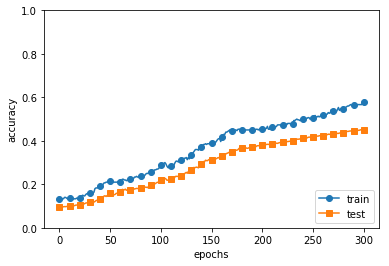

In [16]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()